# Module 3 - Episode 12: Walking Route with OSMnx

In this lesson, you'll learn how to calculate and plot a walking route between two landmarks in Lisbon, Portugal: **Santa Apolónia Station** and **Terreiro do Paço**. This builds on previous episodes using OSMnx, NetworkX, GeoPandas, and Contextily.

In [20]:
!pip install osmnx networkx geopandas contextily --quiet

In [21]:
import osmnx as ox
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point

In [22]:
# Define coordinates for origin and destination
locations = {
    "Santa Apolónia": (38.7139, -9.1216),
    "Terreiro do Paço": (38.7078, -9.1374)
}

In [ ]:
# Load the pedestrian network of Porto
G = ox.graph_from_place("Lisbon, Portugal", network_type="walk")
ox.plot_graph(G, node_size=0)

# note: This code can be slow.

In [ ]:
# Get the nearest graph nodes to each location
orig_node = ox.distance.nearest_nodes(G, X=locations["Santa Apolónia"][1], Y=locations["Santa Apolónia"][0])
dest_node = ox.distance.nearest_nodes(G, X=locations["Terreiro do Paço"][1], Y=locations["Terreiro do Paço"][0])

In [16]:
# Calculate shortest path by distance
route_nodes = nx.shortest_path(G, orig_node, dest_node, weight="length")

# Print total route distance
distance = nx.path_weight(G, route_nodes, weight="length")
print(f"Route length: {distance:.1f} meters")

Route length: 1664.7 meters


In [17]:
# Convert route to GeoDataFrame
route_gdf = ox.graph_to_gdfs(G.subgraph(route_nodes), nodes=False)[["geometry"]]
route_gdf = route_gdf.to_crs(epsg=3857)

In [18]:
# Create GeoDataFrame for the points
points = {
    "name": ["Santa Apolónia", "Terreiro do Paço"],
    "geometry": [Point(xy[::-1]) for xy in locations.values()]
}
pts_gdf = gpd.GeoDataFrame(points, crs="EPSG:4326").to_crs(epsg=3857)

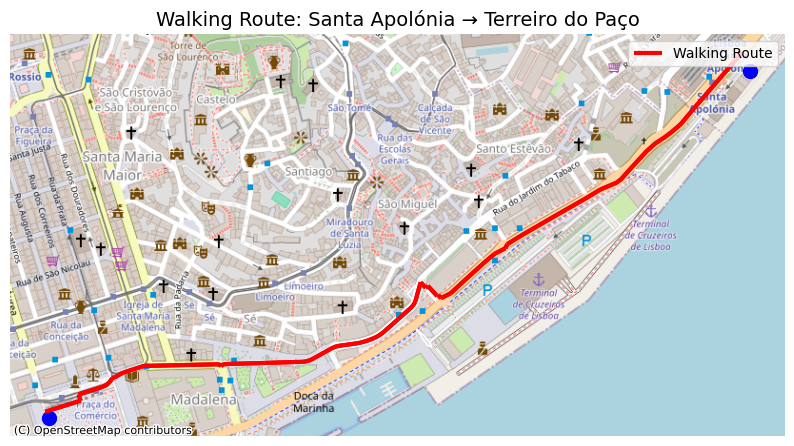

In [19]:
# Plot
fig, ax = plt.subplots(figsize=(10, 10))
route_gdf.plot(ax=ax, linewidth=3, color="red", label="Walking Route")
pts_gdf.plot(ax=ax, color="blue", markersize=100)

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_title("Walking Route: Santa Apolónia → Terreiro do Paço", fontsize=14)
ax.axis("off")
plt.legend()
plt.show()

## Summary
In this episode, you learned how to calculate and visualize a **walking route** between two landmarks in Lisbon using `OSMnx`, `NetworkX`, and `GeoPandas`.

You downloaded the pedestrian network for Lisbon, found the nearest nodes to your origin and destination, and computed the shortest path based on distance. You also created a map of the route using `matplotlib` and `contextily`.